In [1]:
# Load packages
import time
from utilities import *

### Remark 5.8. Bounding volatility

- Set objective function to be $g_1(x)+\zeta g_2(x)$ and vary $\xi$ to hit the relative entropy constraint for alternative $\zeta$ with no sign restrictions on $\zeta$.


- Compute 
$$
\log \int \mathbb{E}\left[N_1^*g_1(X_1)\mid \mathfrak{I}_0\right]d Q_0^* - \int \mathbb{E}\left[N_1^*g_2(X_1)\mid \mathfrak{I}_0\right]d Q_0^*
$$
which will depend on $\zeta$.


- Minimize over $\zeta$.


- Perform this for $g_1(X_1)=R_1^w$ and $g_2(X_1)=\log R_1^w$ to compute a lower bound on the proportional risk premium.

In [23]:
# Lower bound
# Count time
time_start = time.time() 

# Use a grid for ζ
ζ_min = -1.04
ζ_max = -0.96
ζ_points = 20*4
ζ_step = (ζ_max-ζ_min)/ζ_points
ζ_grid = np.arange(ζ_min,ζ_max,ζ_step)
vol_array = np.zeros_like(ζ_grid)

# Do computation for each ζ
for i in range(len(ζ_grid)):
    if i%10 == 0:
        print('--- processing: #%s ---' % i)
    ζ = ζ_grid[i]
    vol_array[i],_,_,_ = volatility(ζ=ζ,x_min_RE=1.2,lower=True,ξ_tol=1e-7)
print('--- finished ---')

# Print out the time spent
time_spent = round(time.time()-time_start,4)
print("Time spent: %s seconds ---" % (time_spent))

--- processing: #0 ---
--- processing: #10 ---
--- processing: #20 ---
--- processing: #30 ---
--- processing: #40 ---
--- processing: #50 ---
--- processing: #60 ---
--- processing: #70 ---
--- finished ---
Time spent: 618.1917 seconds ---


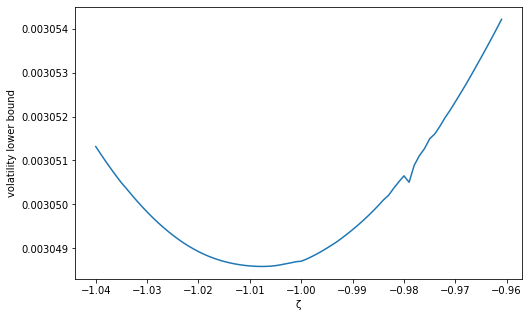

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

plt.plot(ζ_grid,vol_array)
plt.xlabel('ζ')
plt.ylabel('volatility lower bound')
# plt.savefig('vol_plot_20%',dpi=100)
plt.show()

In [25]:
vol_optimal = vol_array.min()
ζ_optimal = ζ_grid[vol_array == vol_optimal][0]
print('Optimal ζ: %s' % np.round(ζ_optimal,4))
print('Lower bound on the proportional risk premium: %s' % vol_optimal)

Optimal ζ: -1.008
Lower bound on the proportional risk premium: 0.003048588972812712


In [26]:
ζ_grid

array([-1.04 , -1.039, -1.038, -1.037, -1.036, -1.035, -1.034, -1.033,
       -1.032, -1.031, -1.03 , -1.029, -1.028, -1.027, -1.026, -1.025,
       -1.024, -1.023, -1.022, -1.021, -1.02 , -1.019, -1.018, -1.017,
       -1.016, -1.015, -1.014, -1.013, -1.012, -1.011, -1.01 , -1.009,
       -1.008, -1.007, -1.006, -1.005, -1.004, -1.003, -1.002, -1.001,
       -1.   , -0.999, -0.998, -0.997, -0.996, -0.995, -0.994, -0.993,
       -0.992, -0.991, -0.99 , -0.989, -0.988, -0.987, -0.986, -0.985,
       -0.984, -0.983, -0.982, -0.981, -0.98 , -0.979, -0.978, -0.977,
       -0.976, -0.975, -0.974, -0.973, -0.972, -0.971, -0.97 , -0.969,
       -0.968, -0.967, -0.966, -0.965, -0.964, -0.963, -0.962, -0.961])